<a href="https://colab.research.google.com/github/TuanDat99/MachineLearning_Assignment-8-15-12-2020-/blob/main/plot_mv_kmeans_tutorial_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
pip install mvlearn

     |████████████████████████████████| 2.1MB 7.7MB/s 


In [6]:
# License: MIT

from mvlearn.datasets import load_UCImultifeature
from mvlearn.cluster import MultiviewKMeans
from sklearn.cluster import KMeans
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import normalized_mutual_info_score as nmi_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load in UCI digits multiple feature data

RANDOM_SEED = 5

# Load dataset along with labels for digits 0 through 4
n_class = 5
Xs, labels = load_UCImultifeature(
    select_labeled=list(range(n_class)), views=[0, 1])


# Helper function to display data and the results of clustering
def display_plots(pre_title, data, labels):
    # plot the views
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    dot_size = 10
    ax[0].scatter(data[0][:, 0], data[0][:, 1], c=labels, s=dot_size)
    ax[0].set_title(pre_title + ' View 1')
    ax[0].axes.get_xaxis().set_visible(False)
    ax[0].axes.get_yaxis().set_visible(False)

    ax[1].scatter(data[1][:, 0], data[1][:, 1], c=labels, s=dot_size)
    ax[1].set_title(pre_title + ' View 2')
    ax[1].axes.get_xaxis().set_visible(False)
    ax[1].axes.get_yaxis().set_visible(False)

    plt.show()

In [7]:
# Singleview kmeans clustering

# Cluster each view separately
s_kmeans = KMeans(n_clusters=n_class, random_state=RANDOM_SEED)
s_clusters_v1 = s_kmeans.fit_predict(Xs[0])
s_clusters_v2 = s_kmeans.fit_predict(Xs[1])

# Concatenate the multiple views into a single view
s_data = np.hstack(Xs)
s_clusters = s_kmeans.fit_predict(s_data)

# Compute nmi between true class labels and singleview cluster labels
s_nmi_v1 = nmi_score(labels, s_clusters_v1)
s_nmi_v2 = nmi_score(labels, s_clusters_v2)
s_nmi = nmi_score(labels, s_clusters)
print('Singleview View 1 NMI Score: {0:.3f}\n'.format(s_nmi_v1))
print('Singleview View 2 NMI Score: {0:.3f}\n'.format(s_nmi_v2))
print('Singleview Concatenated NMI Score: {0:.3f}\n'.format(s_nmi))

# Multiview kmeans clustering

# Use the MultiviewKMeans instance to cluster the data
m_kmeans = MultiviewKMeans(n_clusters=n_class, random_state=RANDOM_SEED)
m_clusters = m_kmeans.fit_predict(Xs)

# Compute nmi between true class labels and multiview cluster labels
m_nmi = nmi_score(labels, m_clusters)
print('Multiview NMI Score: {0:.3f}\n'.format(m_nmi))

Singleview View 1 NMI Score: 0.632

Singleview View 2 NMI Score: 0.753

Singleview Concatenated NMI Score: 0.753

Multiview NMI Score: 0.693



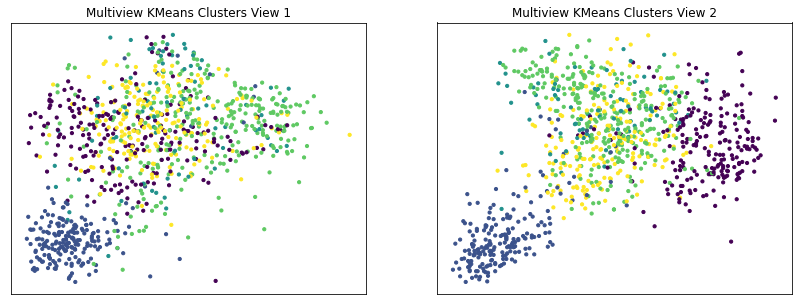

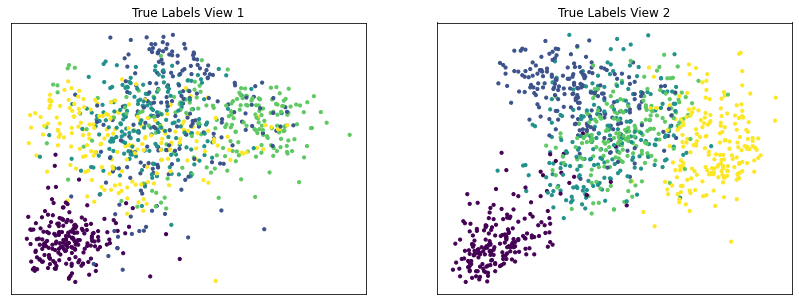

In [8]:
# Running TSNE to display clustering results via low dimensional embedding
tsne = TSNE()
new_data_1 = tsne.fit_transform(Xs[0])
new_data_2 = tsne.fit_transform(Xs[1])

display_plots('Multiview KMeans Clusters', Xs, m_clusters)
display_plots('True Labels', Xs, labels)